In [543]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [544]:
pd.set_option('display.max_columns', 50)
fname = "Student Alcohol Consumption.csv"
df = pd.read_csv(fname)
columnsA = df.columns
columnsB = ["學校", "性別", "年齡", "居住區（都市或郊區）", "家庭規模", "父母同居狀況（同居或分居）", "母親教育程度", "父親教育程度", "母親工作", "父親工作", "原因", "監護人", "家庭到學校的路程", "每週學習時間", "過去不及格次數", "課外輔導", "家庭協助教育", "付費課程", "課外活動", "是否有讀幼兒園", "是否接受高等教育", "是否在家上網", "情侶關係", "家庭關係", "放學休閒時間", "與朋友外出的經常性", "工作日飲酒量", "周末飲酒量", "健康狀態", "出席情況", "第一階段成績", "第二階段成績", "最終成績"]
columnsC = ["'GP'  or  'MS'", "'F' or 'M'", "from 15 to 22", "'U' or 'R'", "'LE3' or 'GT3'", "'T' or 'A'", "from 0 to 4", "from 0 to 4", "'teacher', 'health', 'services', 'at_home' or 'other'", "'teacher', 'health', 'services', 'at_home' or 'other'", "'home', 'reputation', 'course' or 'other'", "'mother', 'father' or 'other'", "from 1 to 4", "from 1 to 4", "If 1<=n<3 , n, else 4", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "from 1 to 5", "from 1 to 5", "from 1 to 5", "from 1 to 5", "from 1 to 5", "from 1 to 5", "from 0 to 93", "from 0 to 20", "from 0 to 20", "from 0 to 20"]
df_introduce = pd.DataFrame(columns=columnsB)
df_introduce.loc[0] = columnsA
df_introduce.loc[1] = columnsC
df_introduce

,學校,性別,年齡,居住區（都市或郊區）,家庭規模,父母同居狀況（同居或分居）,母親教育程度,父親教育程度,母親工作,父親工作,原因,監護人,家庭到學校的路程,每週學習時間,過去不及格次數,課外輔導,家庭協助教育,付費課程,課外活動,是否有讀幼兒園,是否接受高等教育,是否在家上網,情侶關係,家庭關係,放學休閒時間,與朋友外出的經常性,工作日飲酒量,周末飲酒量,健康狀態,出席情況,第一階段成績,第二階段成績,最終成績
0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,'GP' or 'MS','F' or 'M',from 15 to 22,'U' or 'R','LE3' or 'GT3','T' or 'A',from 0 to 4,from 0 to 4,"'teacher', 'health', 'services', 'at_home' or ...","'teacher', 'health', 'services', 'at_home' or ...","'home', 'reputation', 'course' or 'other'","'mother', 'father' or 'other'",from 1 to 4,from 1 to 4,"If 1<=n<3 , n, else 4",'yes' or 'no','yes' or 'no','yes' or 'no','yes' or 'no','yes' or 'no','yes' or 'no','yes' or 'no','yes' or 'no',from 1 to 5,from 1 to 5,from 1 to 5,from 1 to 5,from 1 to 5,from 1 to 5,from 0 to 93,from 0 to 20,from 0 to 20,from 0 to 20


In [545]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


            Alc     goout
Alc    1.000000  0.364339
goout  0.364339  1.000000


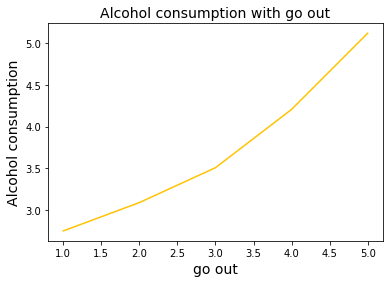

In [546]:
import matplotlib.ticker as ticker
df["Alc"] = df["Dalc"] + df["Walc"]
# 統計飲酒狀況與和朋友出門的頻率的相關性
print(df[["Alc", "goout"]].corr())
plt.plot(df[["Alc", "goout"]].groupby('goout').mean(), color='#FFC300')
plt.title("Alcohol consumption with go out", fontsize=14)
plt.ylabel("Alcohol consumption", fontsize=14)
plt.xlabel("go out", fontsize=14)
plt.show()


              Dalc  absences
Dalc      1.000000  0.172952
absences  0.172952  1.000000


<AxesSubplot:xlabel='Dalc'>

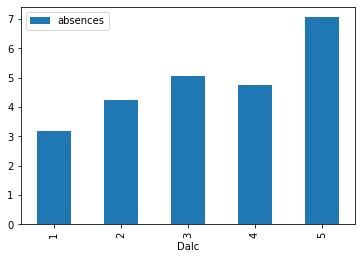

In [547]:
print(df[["Dalc", "absences"]].corr())
df[["Dalc", "absences"]].groupby('Dalc').mean().plot(kind='bar')

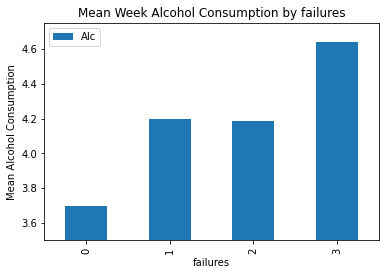

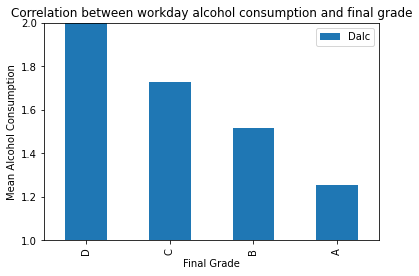

               Alc  failures
Alc       1.000000  0.102211
failures  0.102211  1.000000
          Dalc        G3
Dalc  1.000000 -0.204719
G3   -0.204719  1.000000


In [548]:

df[["Alc", "failures"]].groupby('failures').mean().plot(kind='bar')
failures = df.groupby('failures')['Dalc'].mean()
failures.plot(kind='bar', title='Mean Week Alcohol Consumption by failures')
plt.ylabel('Mean Alcohol Consumption')
plt.ylim(3.5,4.75)
plt.show()
bins = [0,5,10,15,20]
# 設定分數級距表示
labels = ["D","C","B","A"]
df['score'] = pd.cut(df['G3'],bins, right=False,labels=labels)
score = df[["Dalc", "score"]].groupby('score').mean()
score.plot(kind='bar', title='Correlation between workday alcohol consumption and final grade')
plt.ylabel('Mean Alcohol Consumption')
plt.xlabel('Final Grade')
plt.ylim(1,2)
plt.show()
print(df[["Alc", "failures"]].corr())
print(df[["Dalc", "G3"]].corr())

# So don't drink too much alcohol.